In [11]:
import pandas_datareader.data as web    
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import datetime
import plotly.io as pio
pio.renderers.default = "svg"
import plotly.express as px

### Transfer Functions

#### MA(2) filter introduces a spurious cycle in the series

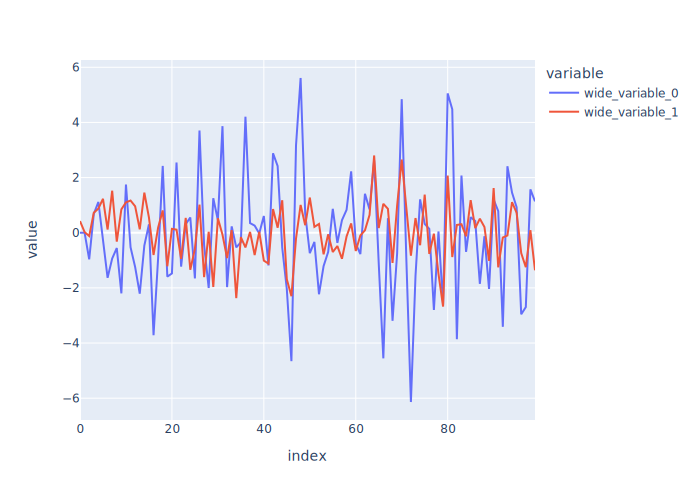

In [16]:
import numpy as np
σ = 1
N = 100
e = np.random.normal(0,σ,N)
y = np.zeros(N)
for t in range(2,N):
    y[t] = e[t] - 2*e[t-2]
px.line(y=[y,e], labels=['y','e'])

/usr/local/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning:

nperseg = 256 is greater than input length  = 100, using nperseg = 100



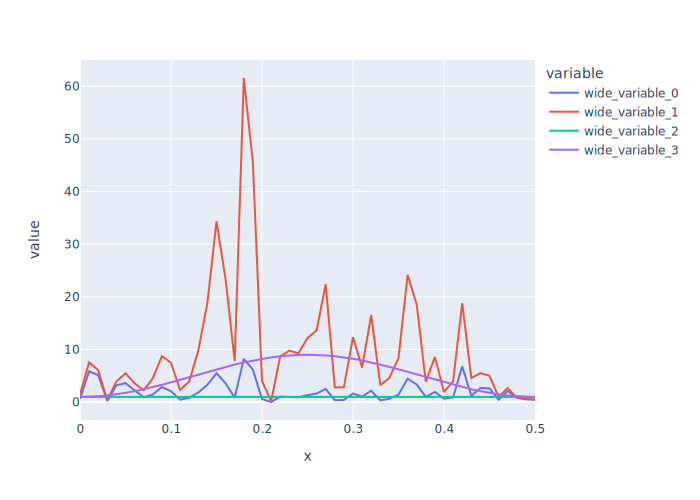

In [17]:
import plotly.express as px
from scipy.signal import periodogram, welch
f, Pe = welch(e,fs=1, scaling='density')
f, Py = welch(y,fs=1, scaling='density')
Pe_true = σ**2
ω = np.linspace(0,np.pi,Py.shape[0])
Py_true = (5-4*np.cos(2*ω))*Pe_true
px.line(y=[Pe,Py,Pe_true*np.ones(Py.shape), Py_true*np.ones(Py.shape)],x=f)

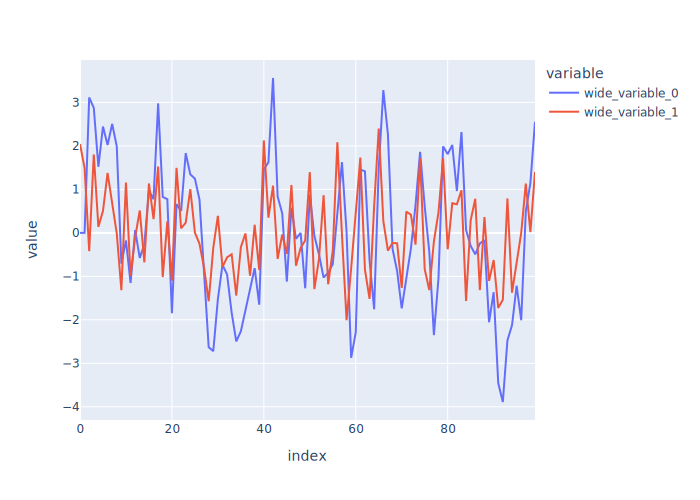

In [18]:
import numpy as np
σ = 1
e = np.random.normal(0,σ,N)
m = 3
y = np.zeros(N)
for t in range(2,N):
    y[t] = 0
    for i in range(m):
        y[t] += e[t-i]
px.line(y=[y,e], labels=['y','e'])

#### Equal weighted Moving average is a low-pass filter (kills high frequency movements)

/usr/local/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning:

nperseg = 256 is greater than input length  = 100, using nperseg = 100



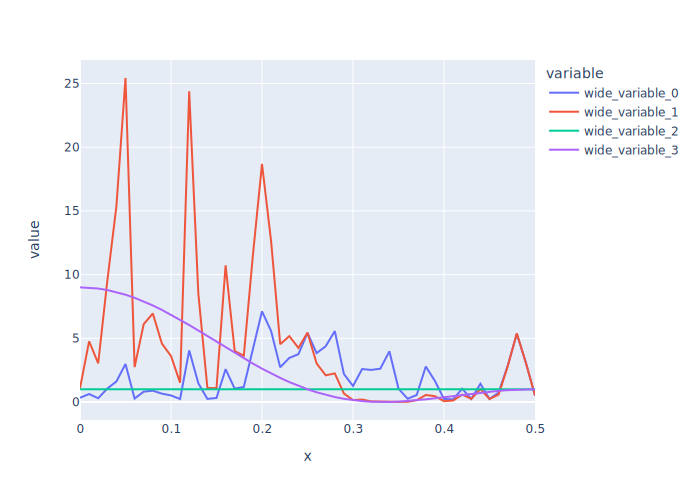

In [19]:
import plotly.express as px
from scipy.signal import periodogram, welch
f, Pe = welch(e,fs=1, scaling='density')
f, Py = welch(y,fs=1, scaling='density')
Pe_true = σ**2
ω = np.linspace(0,np.pi,Py.shape[0])
transf = np.abs(np.sum(np.array([np.exp(1j*i*ω) for i in range(m)]),axis=0))**2
Py_true = transf*Pe_true
px.line(y=[Pe,Py,Pe_true*np.ones(Py.shape), Py_true*np.ones(Py.shape)],x=f)